In [1]:
from detectron2.utils.logger import setup_logger

In [3]:
setup_logger()

<Logger detectron2 (DEBUG)>

In [4]:
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer

In [5]:
import os 
import pickle

In [6]:
from utils import *

In [6]:
config_file_path = "COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"

In [7]:
output_dir = ".\\barcount\output\object_detection"
num_classes = 1

In [8]:
device = "cpu"

In [9]:
train_dataset_name = "BC_train"
train_images_path = "train"
train_json_annot_path = "train.json"

In [10]:
test_dataset_name = "BC_test"
test_images_path = "test"
test_json_annot_path = "test.json"

In [11]:
cfg_save_path = ".\detectron2\OD_BC_cfg.pickle"

In [12]:
register_coco_instances(name = train_dataset_name, metadata={}, json_file = train_json_annot_path, image_root =  train_images_path)

In [13]:
register_coco_instances(name = test_dataset_name, metadata={}, json_file = test_json_annot_path, image_root =  test_images_path)

WARNING [04/29 21:58:05 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/29 21:58:05 d2.data.datasets.coco]: Loaded 50 images in COCO format from train.json


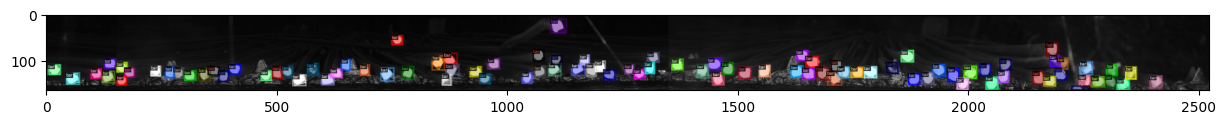

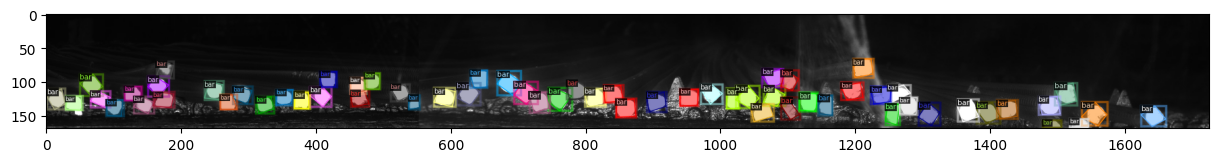

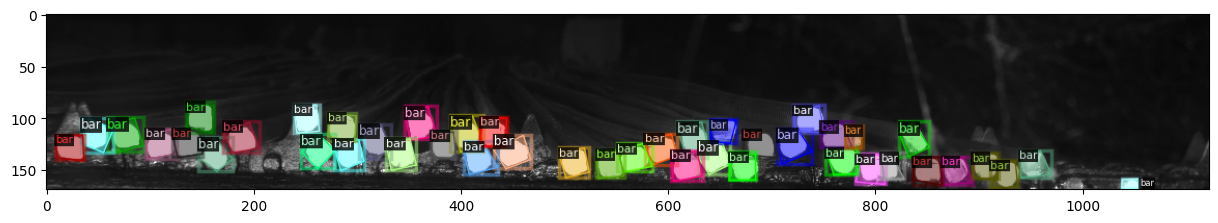

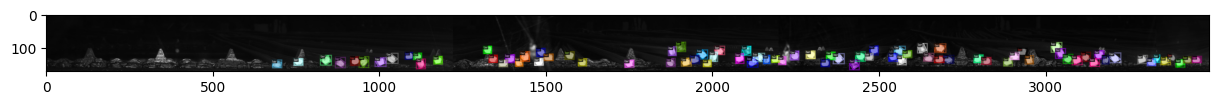

In [17]:
plot_samples(dataset_name=train_dataset_name, n=4)

In [15]:
def main():
    cfg = get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, test_dataset_name, num_classes, device, output_dir)
    
    with open(cfg_save_path, 'wb') as f:
        pickle.dump(cfg, f, protocol = pickle.HIGHEST_PROTOCOL)
        
    os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)
    
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=True)
    
    trainer.train()

In [16]:
if __name__ == '__main__':
    
    main()

[04/29 21:09:01 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

C:\Users\divya\.conda\envs\detectron2_env\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/29 21:11:49 d2.utils.events]:  eta: 0:09:49  iter: 119  total_loss: 0.7721  loss_cls: 0.1238  loss_box_reg: 0.3977  loss_rpn_cls: 0.0904  loss_rpn_loc: 0.1578    time: 7.7011  last_time: 7.8384  data_time: 0.4073  last_data_time: 0.0016   lr: 0.00014885  
[04/29 21:14:18 d2.utils.events]:  eta: 0:07:19  iter: 139  total_loss: 0.7498  loss_cls: 0.1049  loss_box_reg: 0.3993  loss_rpn_cls: 0.0816  loss_rpn_loc: 0.1634    time: 7.5691  last_time: 5.9337  data_time: 0.0030  last_data_time: 0.0021   lr: 0.00017383  
[04/29 21:16:38 d2.utils.events]:  eta: 0:04:48  iter: 159  total_loss: 0.7336  loss_cls: 0.1029  loss_box_reg: 0.3852  loss_rpn_cls: 0.08999  loss_rpn_loc: 0.1593    time: 7.3592  last_time: 9.6011  data_time: 0.0021  last_data_time: 0.0024   lr: 0.0001988  
[04/29 21:19:13 d2.utils.events]:  eta: 0:02:24  iter: 179  total_loss: 0.7249  loss_cls: 0.1076  loss_box_reg: 0.3705  loss_rpn_cls: 0.07801  loss_rpn_loc: 0.1545    time: 7.4619  last_time: 5.9302  data_time: 0.0055  l